In [1]:
!apt-get -y install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [18]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 24.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

import os
import re
import time
import datetime as dt # 사용시 datetime.dt 로 사용 # 현재 시간 사용
from datetime import datetime # 사용시 함수로 바로 사용 #-> 시간 비교

## 데이터 불러오기 및 전처리

In [3]:
df_suggestion_rampage = pd.read_excel("../content/drive/MyDrive/Project/summonerswar/df_suggestion_rampage.xlsx", index_col=0)
df_suggestion_arena = pd.read_excel("../content/drive/MyDrive/Project/summonerswar/df_suggestion_arena.xlsx", index_col=0)

In [9]:
# 해당 null값은 텍스트가 없고 단순히 동영상만 있는 건의사항이었음.
print(df_suggestion_rampage.isnull().sum())
print(df_suggestion_arena.isnull().sum())

url        0
content    2
dtype: int64
url        0
content    2
dtype: int64


In [10]:
# 분석에 불필요한 텍스트 삭제
df_suggestion_rampage['content'] = df_suggestion_rampage['content'].str.replace('남겨주신 소중한 의견은 매일 확인하여 논의되고 있습니다. 감사합니다 :D', '' )
df_suggestion_arena['content'] = df_suggestion_arena['content'].str.replace('남겨주신 소중한 의견은 매일 확인하여 논의되고 있습니다. 감사합니다 :D', '' )

In [15]:
# 비어 있는 값 str로 대체
df_suggestion_rampage['content'] = df_suggestion_rampage['content'].fillna('').astype(str)
df_suggestion_arena['content'] = df_suggestion_arena['content'].fillna('').astype(str)

In [19]:
from konlpy.tag import Okt

# Okt 객체 생성
okt = Okt()

# 명사 추출 함수
def extract_nouns(text):
    nouns = okt.nouns(text)
    return nouns

# title 컬럼에서 명사 추출
df_suggestion_rampage['content_nouns'] = df_suggestion_rampage['content'].apply(extract_nouns)
df_suggestion_arena['content_nouns'] = df_suggestion_arena['content'].apply(extract_nouns)

## 워드클라우드

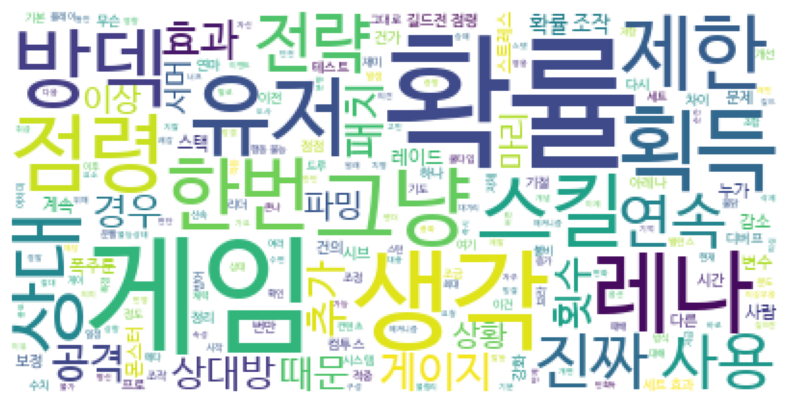

In [41]:
# 명사 추출 이후 리스트 생성
list_rampage_nouns = sum(df_suggestion_rampage["content_nouns"].to_list(),[])

# 폭주 제외 두글자 이상인 명사 가져오기
filtered_nouns = [noun for noun in list_rampage_nouns if len(noun) >= 2 and noun != '폭주']

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 리스트에서 단어들을 하나의 문자열로 합치기
text = ' '.join(filtered_nouns)

# 워드클라우드 생성
wordcloud = WordCloud(background_color="white", font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
wordcloud.generate_from_text(text)  # 기존 text를 집어넣고 교육

# wordcloud.words_  # 요소별 비율 표시  # 관사는 사라짐

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')  # 축 숨기기
plt.show()

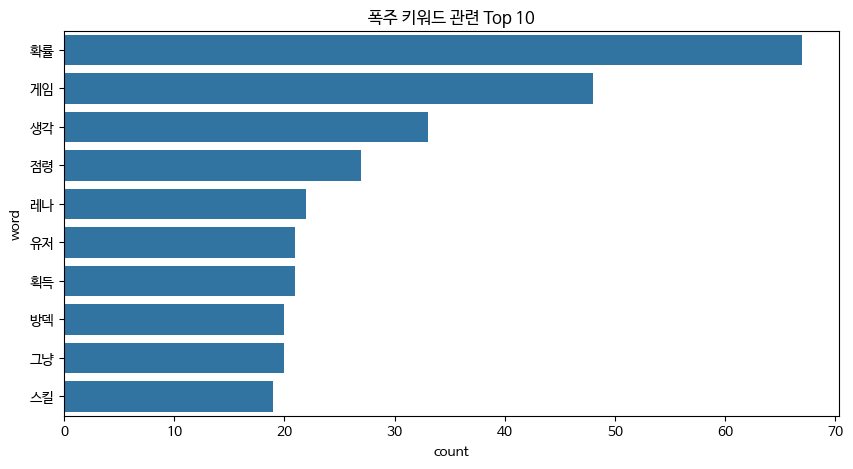

In [42]:
import seaborn as sns
from collections import Counter

# 단어 카운트
word_counts = Counter(text.split())
common_words = word_counts.most_common(10)

# 데이터프레임으로 변환
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# 바 차트 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='word', data=common_words_df)
plt.title('폭주 키워드 관련 Top 10')
plt.show()

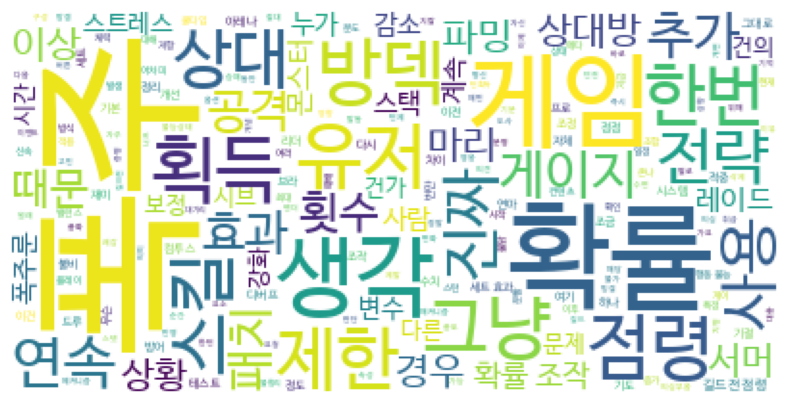

In [45]:
# 명사 추출 이후 리스트 생성
list_arena_nouns = sum(df_suggestion_arena["content_nouns"].to_list(),[])

# 실레나 제외 두글자 이상인 명사 가져오기
filtered_nouns = [noun for noun in list_rampage_nouns if len(noun) >= 2 and noun != '실레나' and noun != '레나']

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 리스트에서 단어들을 하나의 문자열로 합치기
text = ' '.join(filtered_nouns)

# 워드클라우드 생성
wordcloud = WordCloud(background_color="white", font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
wordcloud.generate_from_text(text)  # 기존 text를 집어넣고 교육

# wordcloud.words_  # 요소별 비율 표시  # 관사는 사라짐

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')  # 축 숨기기
plt.show()

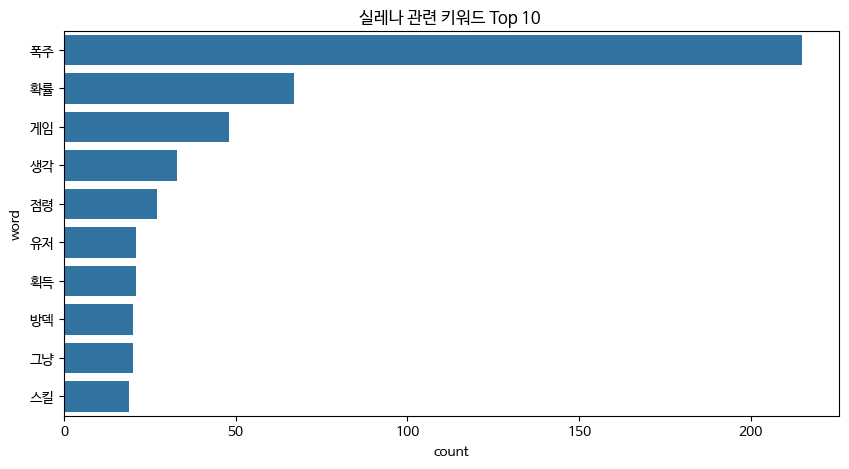

In [46]:
import seaborn as sns
from collections import Counter

# 단어 카운트
word_counts = Counter(text.split())
common_words = word_counts.most_common(10)

# 데이터프레임으로 변환
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# 바 차트 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='word', data=common_words_df)
plt.title('실레나 관련 키워드 Top 10 ')
plt.show()


## 분석 결과

### 1. 폭주 관련 게시글 확인 결과
- 레나 -> 실시간 아레나라고 판단됨.
- 점령 -> 점령전 컨텐츠라고 판단됨.
- 획득 -> 턴 획득, 즉 폭주와 밀접한 키워드 같음.
- 확률, 유저, 점령, 방덱, 스킬, 실레나 키워드들의 빈도 수가 높은 것을 확인
  + 유저 게임 플레이에 다소 영향이 있음.

### 2. 실레나 관련 게시글 확인 결과
- 전체적으로 폭주 관련 게시글과 주제가 비슷한 것을 확인할 수 있음.
  + 폭주와 실레나는 깊은 연관성을 가짐.

## 인사이트 결과

### "폭주"와 유저가 플레이하는 "점령전", "실시간 아레나"에서의 조정이 필요
- 방덱, 점령전, 실시간 아레나 등에 대한 컨텐츠에서의 방안 고려